In [6]:
# Celem programu jest rozpoznawanie na podstawie pomiarów części ciała trzech gatunków ptaków z rodzjau Acrocephalus -
# trzcinniczka, łozówki i zaroślówki. 
# Pomiary są wygenerowane sztucznie, ale są zgodne z danymi literaturowymi

In [37]:
# import pakietów i ustawienia notebooka
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import truncnorm
import pandas as pd
import random
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Trzcinniczek


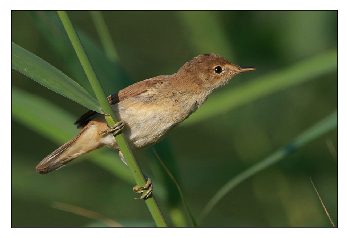

In [8]:
# To jeszcze na poczatek zobaczymy jak wyglądają te ptaki :)
print('Trzcinniczek')
image = mpimg.imread("trz.bmp")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Lozowka


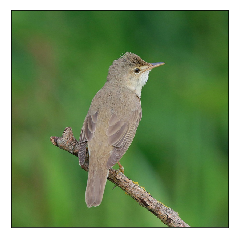

In [9]:
print('Lozowka')
image = mpimg.imread("loz.bmp")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Zaroslowka


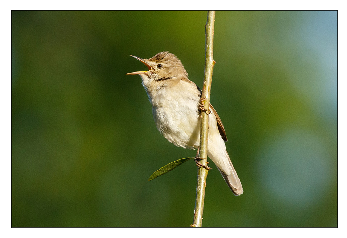

In [10]:
print('Zaroslowka')
image = mpimg.imread("zar.bmp")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
# Generowanie tabeli z pomiarami 666 trzcinniczków
skrzydlo_t = [] 
for j in range(666): 
        skrzydlo_t.append(random.randint(62, 71)) 
        
ogon_t = [] 
for j in range(666): 
        ogon_t.append(random.randint(35, 39))
        

wciecie_pII_t = truncnorm(a=8/3, b=14/3,scale = 3 ).rvs(size=666)
wciecie_pII_t = wciecie_pII_t.round().astype(int)

dl_stopy_t = [] 
for j in range(666): 
        dl_stopy_t.append(random.randint(9, 12))
        
dl_dzioba_t = [] 
for j in range(666): 
        dl_dzioba_t.append(random.randint(10, 13))

trzcinniczek = pd.DataFrame(list(zip(skrzydlo_t, ogon_t, wciecie_pII_t, dl_stopy_t, dl_dzioba_t)), 
               columns =['Skrzydlo', 'Ogon', 'Wciecie_pII', 'dl_stopy', 'dl_dzioba']) 

In [12]:
# Generowanie tabeli z pomiarami 412 łozówek
skrzydlo_l = [] 
for j in range(412): 
        skrzydlo_l.append(random.randint(66, 74)) 
        
ogon_l = [] 
for j in range(412): 
        ogon_l.append(random.randint(36, 41))
        

wciecie_pII_l = truncnorm(a=6/3, b=11/3,scale = 3 ).rvs(size=412)
wciecie_pII_l = wciecie_pII_l.round().astype(int)

dl_stopy_l = [] 
for j in range(412): 
        dl_stopy_l.append(random.randint(7, 10))
        
dl_dzioba_l = [] 
for j in range(412): 
        dl_dzioba_l.append(random.randint(11, 14))

lozowka = pd.DataFrame(list(zip(skrzydlo_l, ogon_l, wciecie_pII_l, dl_stopy_l, dl_dzioba_l)), 
               columns =['Skrzydlo', 'Ogon', 'Wciecie_pII', 'dl_stopy', 'dl_dzioba']) 


In [13]:
# Generowanie tabeli z pomiarami 123 zaroslowek
skrzydlo_z = [] 
for j in range(123): 
        skrzydlo_z.append(random.randint(59, 67))
        
ogon_z = [] 
for j in range(123): 
        ogon_z.append(random.randint(34, 38))
        

wciecie_pII_z = truncnorm(a=9/3, b=15/3,scale = 3 ).rvs(size=123)
wciecie_pII_z = wciecie_pII_z.round().astype(int)

dl_stopy_z = [] 
for j in range(123): 
        dl_stopy_z.append(random.randint(6, 10))
        
dl_dzioba_z = [] 
for j in range(123): 
        dl_dzioba_z.append(random.randint(9, 14))      

zaroslowka = pd.DataFrame(list(zip(skrzydlo_z, ogon_z, wciecie_pII_z, dl_stopy_z, dl_dzioba_z)), 
               columns =['Skrzydlo', 'Ogon', 'Wciecie_pII', 'dl_stopy', 'dl_dzioba'])

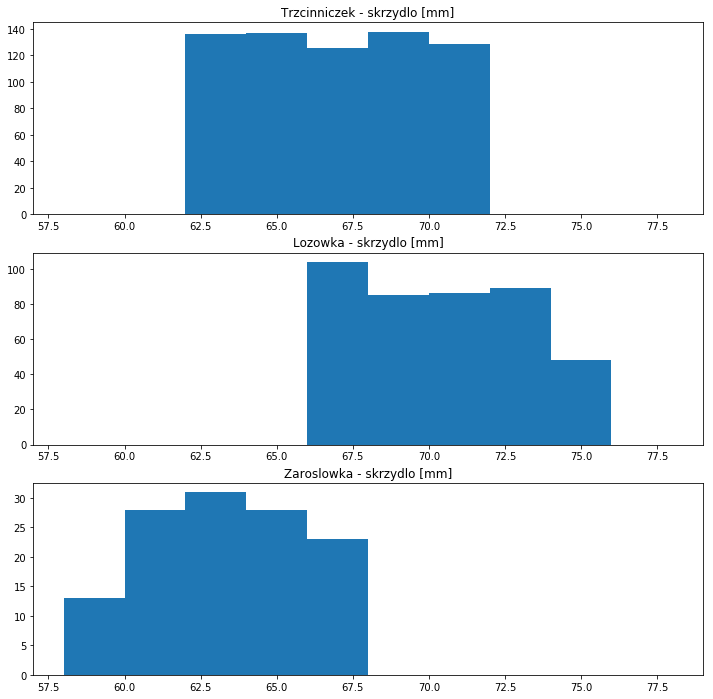

In [24]:
# histogramy z długością skrzydła róznych gatunków
plt.rc('figure', figsize=(12, 12))
plt.subplot(3,1,1)
plt.title('Trzcinniczek - skrzydlo [mm]')
plt.hist(trzcinniczek['Skrzydlo'], range=[58,78], bins = 10)

plt.subplot(3,1,2)
plt.title('Lozowka - skrzydlo [mm]')
plt.hist(lozowka['Skrzydlo'], range=[58,78])

plt.subplot(3,1,3)
plt.title('Zaroslowka - skrzydlo [mm]')
plt.hist(zaroslowka['Skrzydlo'], range=[58,78])

plt.show()

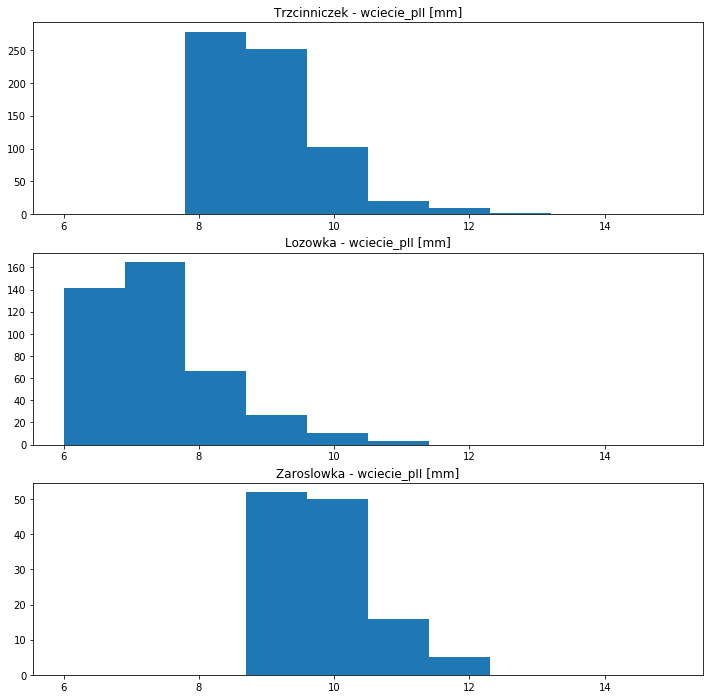

In [26]:
# histogramy z długościa wcięcia na drugiej lotce pierwszorzedowej
plt.subplot(3,1,1)
plt.title('Trzcinniczek - wciecie_pII [mm]')
plt.hist(trzcinniczek['Wciecie_pII'], range=[6,15])

plt.subplot(3,1,2)
plt.title('Lozowka - wciecie_pII [mm]')
plt.hist(lozowka['Wciecie_pII'], range=[6,15])

plt.subplot(3,1,3)
plt.title('Zaroslowka - wciecie_pII [mm]')
plt.hist(zaroslowka['Wciecie_pII'], range=[6,15])

plt.show()

In [27]:
# dodaje kolumny z nazwą gatunku
trzcinniczek['gatunek'] = 'trzcinniczek'
lozowka['gatunek'] = 'lozowka'
zaroslowka['gatunek'] = 'zaroslowka'

# połaczenie trzech tabel w jedną
List = [trzcinniczek, lozowka, zaroslowka]
dane = pd.concat(List, sort=True)
dane.head()

,Ogon,Skrzydlo,Wciecie_pII,dl_dzioba,dl_stopy,gatunek
0,37,71,10,10,10,trzcinniczek
1,36,66,9,12,12,trzcinniczek
2,35,70,8,12,10,trzcinniczek
3,38,63,9,12,10,trzcinniczek
4,37,65,8,12,10,trzcinniczek


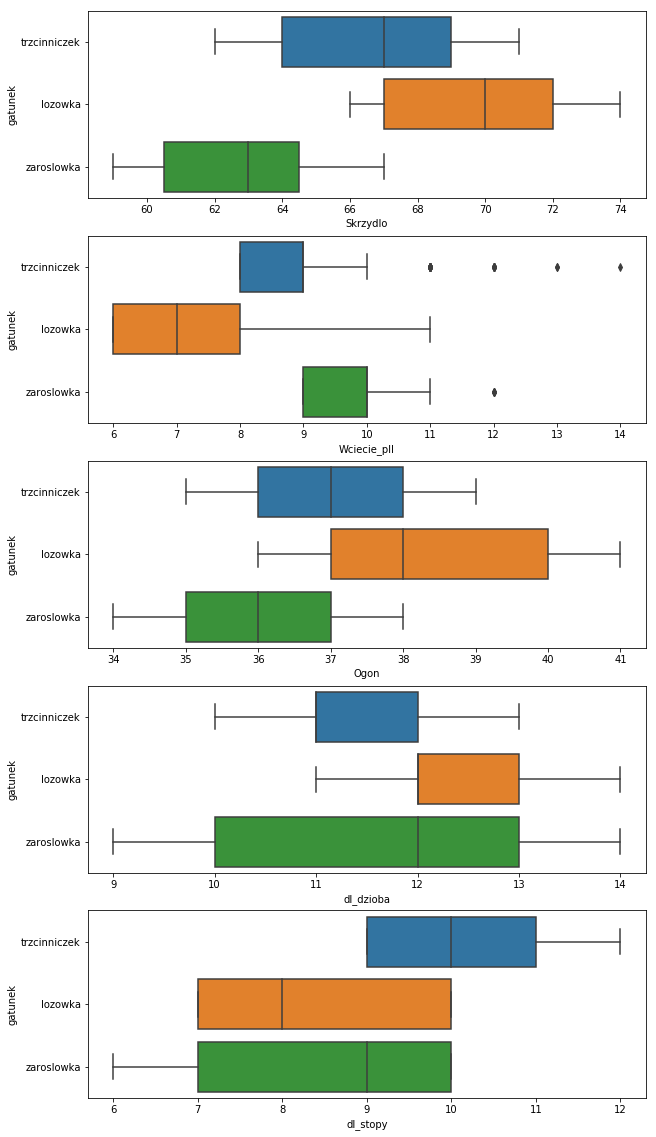

In [29]:
# wykresy pudełkowe dla wielkosci w kolumnach
plt.rc('figure', figsize=(10, 20))
plt.subplot(5,1,1)
ax = sns.boxplot(x="Skrzydlo", y="gatunek", data=dane)
plt.subplot(5,1,2)
ax = sns.boxplot(x="Wciecie_pII", y="gatunek", data=dane)
plt.subplot(5,1,3)
ax = sns.boxplot(x="Ogon", y="gatunek", data=dane)
plt.subplot(5,1,4)
ax = sns.boxplot(x="dl_dzioba", y="gatunek", data=dane)
plt.subplot(5,1,5)
ax = sns.boxplot(x="dl_stopy", y="gatunek", data=dane)

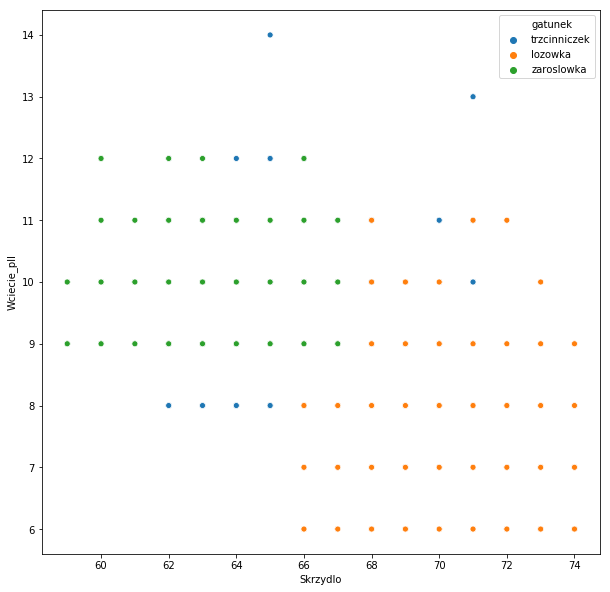

In [32]:
# wykres długości wciecia do długości skrzydła, widac, że łozówka ma generalnie długie skrzydło i krótkie wcięcie
plt.rc('figure', figsize=(10, 10))
sns.scatterplot(x="Skrzydlo", y="Wciecie_pII", data=dane, hue='gatunek');

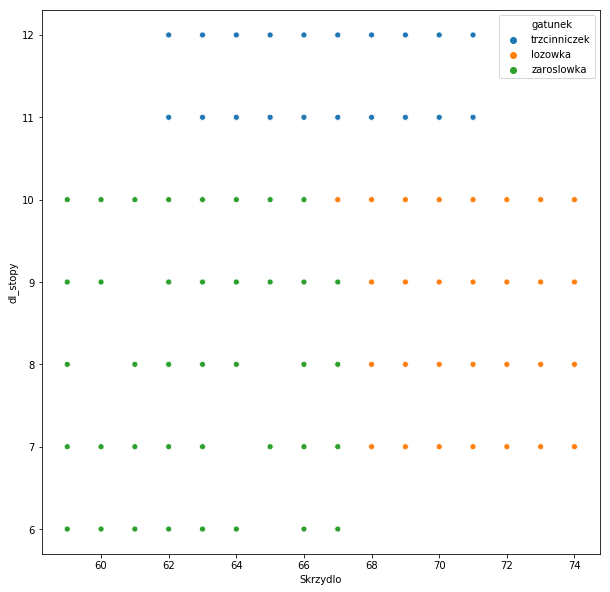

In [34]:
# wykres dł stopy do dł skrzydła, trzciniczki maja najdłuższe stopy, a zaroślówka i łozówka róznią sie dł. skrzydła
sns.scatterplot(x="Skrzydlo", y='dl_stopy', data=dane, hue='gatunek');

In [35]:
dane.describe()

,Ogon,Skrzydlo,Wciecie_pII,dl_dzioba,dl_stopy
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,37.375520,67.294754,8.337219,11.845129,9.532889
std,1.715041,3.537379,1.372475,1.260686,1.511332
min,34.000000,59.000000,6.000000,9.000000,6.000000
25%,36.000000,65.000000,7.000000,11.000000,9.000000
50%,37.000000,67.000000,8.000000,12.000000,10.000000
75%,39.000000,70.000000,9.000000,13.000000,11.000000
max,41.000000,74.000000,14.000000,14.000000,12.000000


In [36]:
dane['gatunek'].value_counts()

trzcinniczek    666
lozowka         412
zaroslowka      123
Name: gatunek, dtype: int64

In [54]:
# podział tabeli na zbiór testowy i treningowy
pomiary = dane.drop('gatunek', axis = 1)
gatunek = pd.DataFrame(dane['gatunek'])

X_train, X_test, Y_train, Y_test = train_test_split(pomiary, gatunek, test_size=0.2, random_state=111)

In [55]:
# sprawdzenie jak poszczególne gatunki reprezentowane są w zbiorze treningowym  
Y_train['gatunek'].value_counts()

trzcinniczek    532
lozowka         333
zaroslowka       95
Name: gatunek, dtype: int64

In [56]:
# sprawdzenie jak poszczególne gatunki reprezentowane są w zbiorze testowym
Y_test['gatunek'].value_counts()

trzcinniczek    134
lozowka          79
zaroslowka       28
Name: gatunek, dtype: int64

In [52]:

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [57]:
# Klasyfikator SGD
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [58]:
# Klasyfikator las losowy
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [59]:
# Regresja logistyczna
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [60]:
# Klasyfikator najbliższych sasiadów
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [61]:
# Naiwny klasyfikator Bayesowski
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [62]:
# Maszyna wektorów nośnych
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [64]:
# drzewo decyzyjne
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

In [65]:
# zebranie wyników w jeden obiekt dataframe
wyniki = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
wyniki_df = wyniki.sort_values(by='Score', ascending=False)
wyniki_df = wyniki_df.set_index('Score')
wyniki_df.head(7)

,Model
Score,
99.17,Random Forest
94.38,KNN
91.70,Decision Tree
90.31,Naive Bayes
87.08,Logistic Regression
82.50,Stochastic Gradient Decent
80.21,Support Vector Machines


In [67]:
# ŁOOOOOOO, losowy las dał niesamowicie dobre wyniki. Sprawdźmy teraz ten alorytm przez walidację krzyżową 
# na zbiorze treningowym
rf = RandomForestClassifier()
wyniki = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Dokładność:", wyniki)
print("Średnia:", wyniki.mean())
print("Odchylenie standardowe:", wyniki.std())

Dokładność: [0.92857143 0.93877551 0.93814433 0.94791667 0.89583333 0.93684211
 0.92631579 0.90526316 0.95789474 0.94736842]
Średnia: 0.9322925479198734
Odchylenie standardowe: 0.01825724065506995


In [69]:
# przeszukam teraz siatkę parametrów w celu odnalezienia optymalnych parametrów
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 100], 
              "min_samples_split" : [2, 4, 8, 16, 25, 50], 
              "n_estimators": [10, 20, 50, 100, 500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier()
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 50}

In [73]:

# Klasyfikator las losowy
random_forest = RandomForestClassifier(criterion = 'gini', min_samples_leaf=1, min_samples_split = 16, 
                                       n_estimators = 50)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

94.69


In [71]:
# Klasyfikator las losowy
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)


98.75


In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[311,  20,   2],
       [  8, 516,   8],
       [  6,  21,  68]], dtype=int64)

In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(RandomForestClassifier(criterion = 'gini', min_samples_leaf=1, min_samples_split = 16, 
                                       n_estimators = 50), X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[306,  23,   4],
       [  0, 532,   0],
       [  1,  23,  71]], dtype=int64)